# Tarea 06: Repaso Raíces
## Métodos Computacionales Taller
## Gabriel Cataño Sánchez

# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)





Tenemos que el área para $\frac{1}{4}$ de área de una circunferencia viene dada por:

\begin{equation}
A = As - 2\frac{r\cos(\frac{\theta}{2} )\cdot r\sin(\frac{\theta}{2})}{2} 
\end{equation}
Como:

\begin{equation}
2 \sin(x)\cos(x) = \sin(2x)
\end{equation}

Luego:

\begin{equation}
A = As - r^2 \frac{ \sin\theta}{2}
\end{equation}
\begin{equation}
As = \frac{r^2\theta}{2}, A = \frac{\pi r^2}{4}
\end{equation}

\begin{equation}
\frac{\pi r^2}{4} = \frac{r^2\theta}{2} - r^2 \frac{ \sin\theta}{2}
\end{equation}

\begin{equation}
\frac{\pi}{2}  = \theta - \sin\theta
\end{equation}

Función Trascendental:

\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}



In [93]:
#LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize
from scipy import interpolate

In [14]:
f = lambda theta: theta - np.sin(theta) - np.pi/2   #Función trascendental
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)        #Puntos en el intervalo

In [15]:
df = pd.DataFrame() 

df["theta"] = theta
df["F_theta"] = f(theta)                            #DataFrame con las columnas de los puntos y la función evaluada

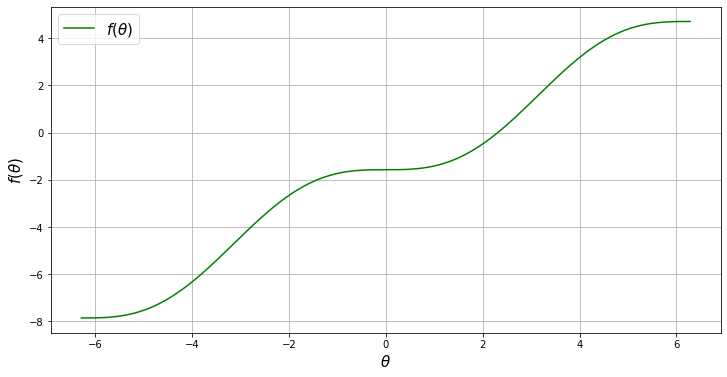

In [16]:
#Gráfica de la función 

plt.figure(figsize=(12,6))
plt.plot(df["theta"], df["F_theta"], 'g', label = "$f(\\theta)$" )
plt.xlabel("$\\theta$", fontsize=15)
plt.ylabel("$f(\\theta)$", fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.show()

In [5]:
#Raíces

#Método bisect

r1 = optimize.bisect(f, 0, 4)
print(f"EL ángulo es: {r1:.5} rad")
Ang1 = np.rad2deg(r1)
print(f"El ángulo en grados es: {Ang1:.5} °")

EL ángulo es: 2.3099 rad
El ángulo en grados es: 132.35 °


In [6]:
#Método Newton-Raphson

r2 = optimize.newton(f,-2, fprime = lambda theta : 1 -np.cos(theta))
print(f"EL ángulo es: {r2:.5} rad")
Ang2 = np.rad2deg(r2)
print(f"El ángulo en grados es: {Ang2:.5} °")

EL ángulo es: 2.3099 rad
El ángulo en grados es: 132.35 °


In [7]:
#Método secante

r3 = optimize.newton(f,-2)
print(f"EL ángulo es: {r3:.5} rad")
Ang3 = np.rad2deg(r3)
print(f"El ángulo en grados es: {Ang3:.5} °")

EL ángulo es: 2.3099 rad
El ángulo en grados es: 132.35 °


In [ ]:
#Método fixed point

r4 = optimize.fixed_point(f, 0)
print(f"EL ángulo es: {r4:.5} rad")
Ang4 = np.rad2deg(r4)
print(f"El ángulo en grados es: {Ang3:.4} °")




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para $x$ y otra para $y$. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [17]:
#Parámetros iniciales

v0 = 60                 #Velocidad en m/s
alpha = np.pi           #Angulo del viento
theta = np.deg2rad(45)  #Angulo de lanzamiento
u = v0/2                #rapidez del viento
b = 0.05                #Parametro de fricción 
g = 9.8                 #Aceleración de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.

In [18]:
#Función de posición en x

def pos_x(t, theta, alpha, v0, b, u,g):
  T1 = u * t * np.cos(alpha)                        #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t))                           #Termino 3

  return T1 + T2*T3 
    

#Función de posición en y

def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #Termino 1
  T2 = (1 - np.e**(- b * t))                              #Termino 2
  T3 = (g / b - u *  np.sin(alpha))*t                     #Termino 3

  return T1* T2 - T3
  


In [19]:
#Tiempo

t = np.linspace(0, 20, 100)  

#Posición en x
x = pos_x(t, theta, *Params)
#Posición en y
y = pos_y(t, theta, *Params) 

#diccionario con los parámetros encontrados
pos = { "X": x , "Y": y, "Tiempo": t }

#Dataframe del diccionario
df = pd.DataFrame.from_dict(pos)


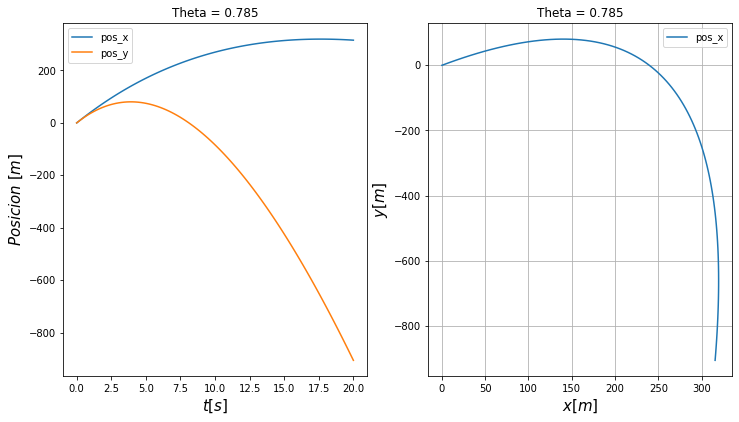

In [24]:
#Gráfica de la posición con respecto al tiempo en x, y

plt.figure(figsize=(12,6.5))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="pos_x") 
plt.plot(df["Tiempo"], df["Y"], label="pos_y")
plt.xlabel("$t[s]$", fontsize = 15)
plt.ylabel("$Posicion$ $[m]$", fontsize = 15)
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
#plt.show()


#Gráfica de la posición de la partícula en x,y
plt.subplot(122)

plt.plot(df["X"], df["Y"], label="pos_x") 
plt.xlabel("$x[m]$", fontsize= 15)
plt.ylabel("$y[m]$", fontsize= 15)
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()
plt.show()

In [32]:
#Función de trascendental para hallar el tiempo de alcance máximo, y=0

h = lambda t1: (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) * (1 - np.e**(- b * t1))  - (g / b - u *  np.sin(alpha))*t1


Tiempo de el alcance máximo y = 0 : 8.112 s


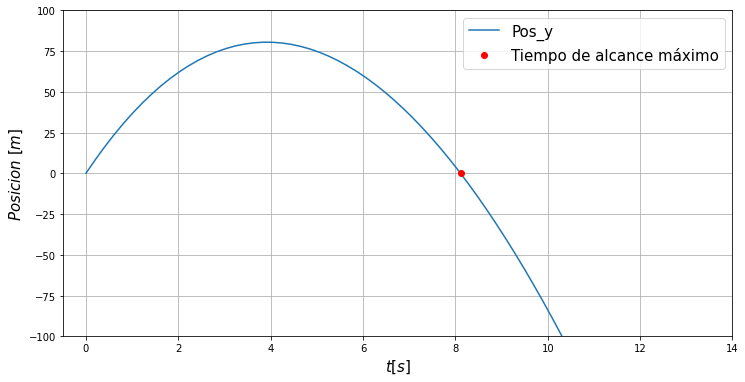

In [54]:
#Raíz de la función trascendental
root1 = optimize.newton(h,7)

#Gráfica de la función y del tiempo de alcance máximo
plt.figure(figsize=(12,6))
plt.plot(df["Tiempo"],h(df["Tiempo"]), label="Pos_y")
plt.plot(root1,0, 'ro', label= "Tiempo de alcance máximo")
plt.xlabel("$t[s]$", fontsize = 15)
plt.ylabel("$Posicion$ $[m]$", fontsize = 15)
plt.title("Theta = " + str("%.3lf"%theta))
plt.xlim(-0.5, 14)
plt.ylim(-100,100)
plt.legend(fontsize =15)
plt.grid()

print(f"Tiempo de el alcance máximo y = 0 : {root1:.4} s")

Alcance máximo en el eje x: 239.6 m


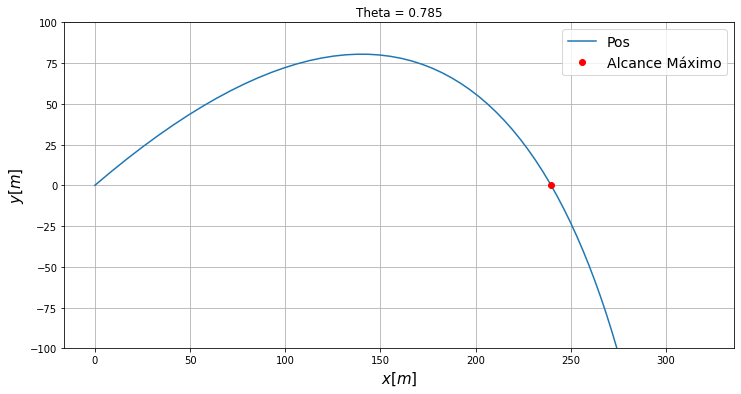

In [60]:
#Reemplazamos el tiempo en la ecuación para la posición en x

x_ = pos_x(root1, theta, *Params)
print(f"Alcance máximo en el eje x: {x_:.4} m")

#Gráfica de la posición de la partícula y el alcance máximo

plt.figure(figsize=(12,6))
plt.plot(df["X"], df["Y"], label="Pos") 
plt.plot(x_, 0, 'ro',label="Alcance Máximo") 
plt.xlabel("$x[m]$", fontsize= 15)
plt.ylabel("$y[m]$", fontsize= 15)
plt.legend(fontsize=14)
plt.title("Theta = " + str("%.3lf"%theta))
plt.ylim(-100,100)
plt.grid()
plt.show()

In [72]:
#Parámetros iniciales

v0 = 60                                      #Velocidad en m/s
alpha = np.pi                                #Angulo del viento
theta_ = np.linspace(np.pi/18,np.pi/2,16)    #Angulos de lanzamiento
u = v0/2                                     #rapidez del viento
b = 0.05                                     #Parametro de fricción 
g = 9.8                                      #Aceleración de la gravedad m/s2

Params = (alpha, v0, b, u, g)                #Parametros en tupla.

In [105]:
#Cálculo de los tiempos para el alcance máximo, y = 0, theta variante
hf= []
for l in theta_:
  h_ = lambda t1: (1./b)*(g/b + v0*np.sin(l) - u*np.sin(alpha) ) * (1 - np.e**(- b * t1))  - (g / b - u *  np.sin(alpha))*t1
  root2 = optimize.newton(h_,10)
  hf = hf + [root2]


In [104]:
#Cálculo de los datos para el alcance máximo con los tiempos hllados para y=0 y theta variante
x_pos = []

for t in hf:
  for a in theta:
    xp = pos_x(t, a, *Params)
    x_pos = x_pos + [xp]


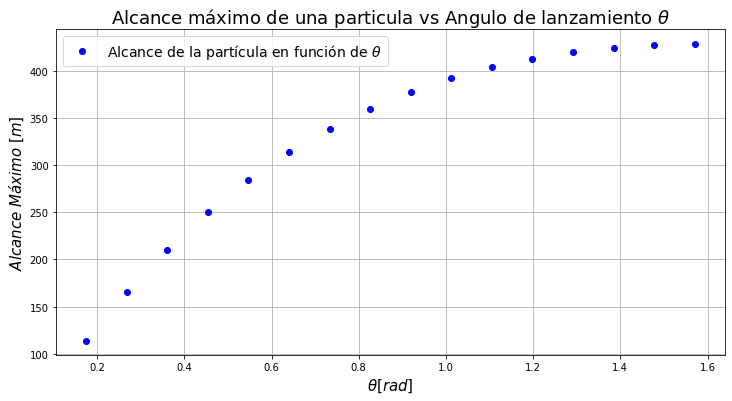

In [103]:
#Gráfica del alcance máximo en función del ángulo de lanzamiento
plt.figure(figsize=(12,6))
plt.plot(theta_,x_pos, 'bo', label = "Alcance de la partícula en función de $\\theta$")
plt.xlabel("$\\theta [rad]$", fontsize =15)
plt.ylabel("$Alcance$ $Máximo$ $[m]$", fontsize =15)
plt.title("Alcance máximo de una particula vs Angulo de lanzamiento $\\theta$", fontsize = 18)
plt.legend(fontsize=14)
plt.grid()

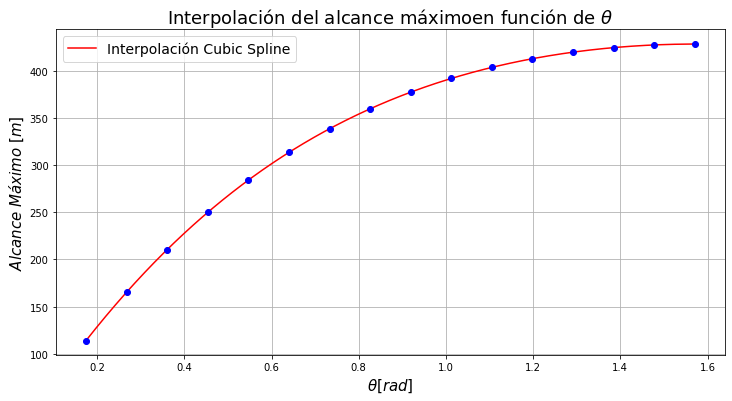

In [102]:
#Dataframe con los datos de theta y alcance máximo
th_x = {"Theta": theta_, "X_max": x_pos}
d = pd.DataFrame(th_x)

#Interpolación del alcance en función de theta con splines cúbicos
P1 =  interpolate.interp1d(d["Theta"], d["X_max"], kind = "cubic")

#Puntos para la gráfica
xx = np.linspace(np.pi/18,np.pi/2, 1000) 

#Gráfica de la interpolació con Splines Cúbicos
plt.figure(figsize=(12,6))
plt.plot(xx, P1(xx), 'r', label = "Interpolación Cubic Spline")
plt.plot(theta_,x_pos, 'bo')
plt.title("Interpolación del alcance máximoen función de $\\theta$", fontsize=18)
plt.xlabel("$\\theta [rad]$", fontsize =15)
plt.ylabel("$Alcance$ $Máximo$ $[m]$", fontsize =15)
plt.legend(fontsize=14)
plt.grid()